# Exploring Grad School Admissions Data #

This project explores the grad school admissions data set used in [this UCLA Logistic Regression Tutorial](http://www.ats.ucla.edu/stat/r/dae/logit.htm).

## Introduction to the Data ##

Using info from the UCLA site, we can build a data dictionary for our data set.

In [397]:
%%html
<style>
table {float:left}
</style>

### Data Dictionary ###

| Name | Description | Type | Role | Possible Values |
|---------------|-------------|---------------|---------|
| `admit`       | Admissions decision | discrete | outcome | 1 = admitted; 0 = not admitted |
| `gre`    | GRE score  | continuous   | predictor | Integer value between 220 and 800 |
| `gpa`      | Grade Point Average  | continuous | predictor | Decimal value between 2.26 and 4.0 |
| `prestige`      | Rank of undergrad alma mater  | discrete | predictor | Integer between 1 and 4; 1 = highest rank; 4 = lowest rank |

Note that `admit` is binary, taking either the value `1` or `0`. This is our **outcome** variable. Also, we treat `gre` and `gpa` as continuous variables, and `prestige` as a discrete variable. `gre`, `gpa`, and `prestige` are our **predictor** variables.

### Initial Data Exploration ###

In [398]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [399]:
# Read in the data.
data = pd.read_csv('admissions.csv')

In [400]:
# Check the size of the DataFrame.
data.shape

(400, 4)

In [401]:
# List out the column names.
data.columns

Index(['admit', 'gre', 'gpa', 'prestige'], dtype='object')

In [402]:
# Check the data types of the column values.
data.dtypes

admit         int64
gre         float64
gpa         float64
prestige    float64
dtype: object

In [403]:
# Examine the first few rows of data.
data.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [404]:
# Examine summary statistics.
data.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [405]:
# Check values appearing in the data set for admit.
data['admit'].unique()

array([0, 1])

In [406]:
# Check values appearing in the data set for gre.
data['gre'].unique()

array([ 380.,  660.,  800.,  640.,  520.,  760.,  560.,  400.,  540.,
        700.,  440.,  480.,  780.,  360.,  500.,  600.,  680.,  620.,
        580.,  460.,  740.,  300.,  720.,  340.,  420.,   nan,  220.])

In [407]:
# Check values appearing in the data set for gpa.
data['gpa'].unique()

array([ 3.61,  3.67,  4.  ,  3.19,  2.93,  3.  ,  2.98,  3.08,  3.39,
        3.92,  3.22,  3.44,  3.87,  2.56,  3.75,  3.81,  3.17,  3.63,
        2.82,  3.35,  3.66,  3.74,  3.29,  3.78,  3.4 ,  3.14,  3.05,
        3.25,  2.9 ,  3.13,  2.68,  2.42,  3.32,  3.15,  3.31,  2.94,
        3.45,  3.46,  2.97,  2.48,  3.86,  3.37,  3.27,  3.34,  3.65,
        3.18,  3.85,  3.59,  3.62,  3.3 ,  3.69,  3.73,  2.92,  3.36,
        3.12,  3.07,  2.71,  2.91,  3.6 ,  3.48,  3.28,  3.83,  3.64,
        3.9 ,  3.33,  3.52,  3.57,  2.88,  3.94,  3.95,  3.56,  3.41,
        3.84,  3.99,  3.72,  3.7 ,  2.67,  2.85,  3.88,  3.38,  3.54,
        2.79,  2.95,  3.58,  3.93,  3.43,  2.86,  2.52,  3.49,  3.82,
        3.5 ,  2.73,  3.24,  3.77,  3.51,  2.81,  3.53,  2.62,  3.23,
        3.01,   nan,  3.76,  3.47,  3.2 ,  3.89,  3.8 ,  3.16,  3.02,
        2.87,  3.42,  2.76,  2.96,  3.04,  3.91,  3.21,  3.55,  3.11,
        3.1 ,  2.26,  2.78,  3.97,  2.55,  3.98,  2.83,  2.84,  3.71,
        2.69,  2.7 ,

In [408]:
# Check values appearing in the data set for prestige.
data['prestige'].unique()

array([  3.,   1.,   4.,   2.,  nan])

There are null values present for `gre`, `gpa`, and `prestige`, so we'll want to take care of these.

We can get a broad view of this missing data in our dataset by using [Aleksey Bilogur's `missingno` visualization tool](https://github.com/ResidentMario/missingno).

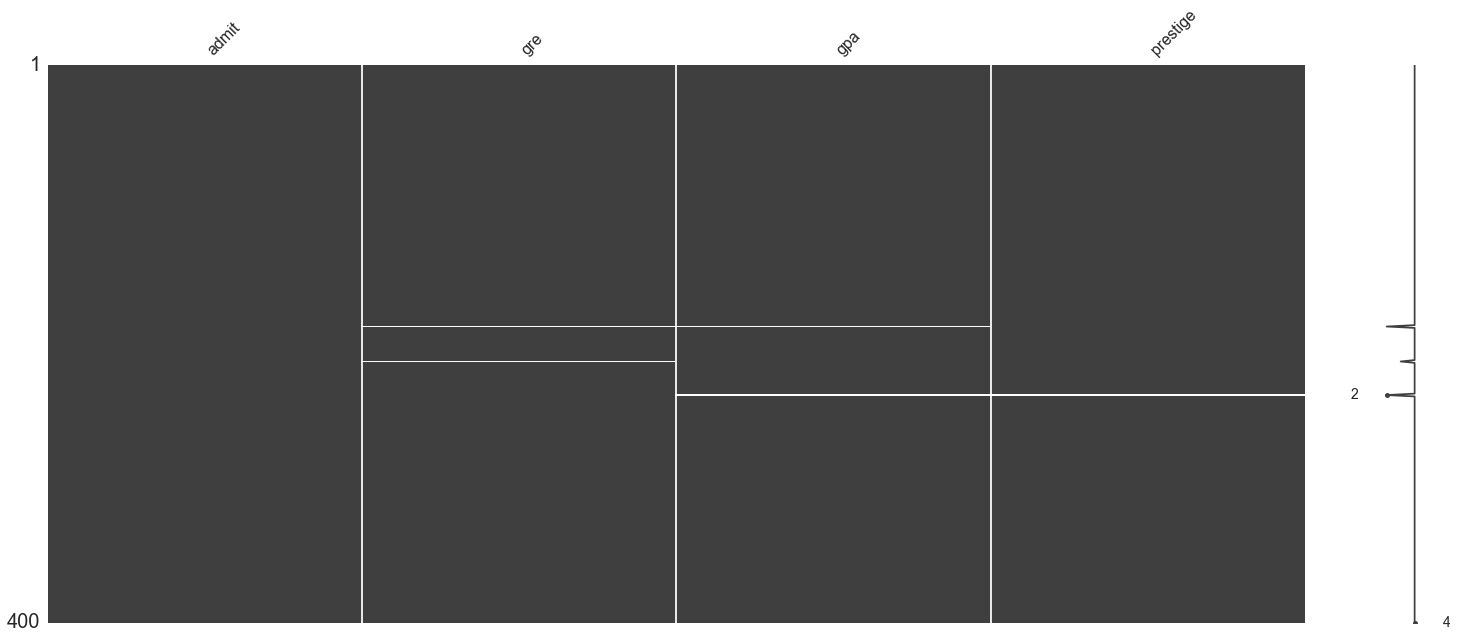

In [409]:
import missingno as msno
msno.matrix(data)

Since there is very little missing data, we'll simply remove the rows that contain null values and this shouldn't significantly affect our analysis.

In [410]:
# Remove rows that contain missing values. There are only three.
data_no_null = data.dropna()
data_no_null.shape

(397, 4)

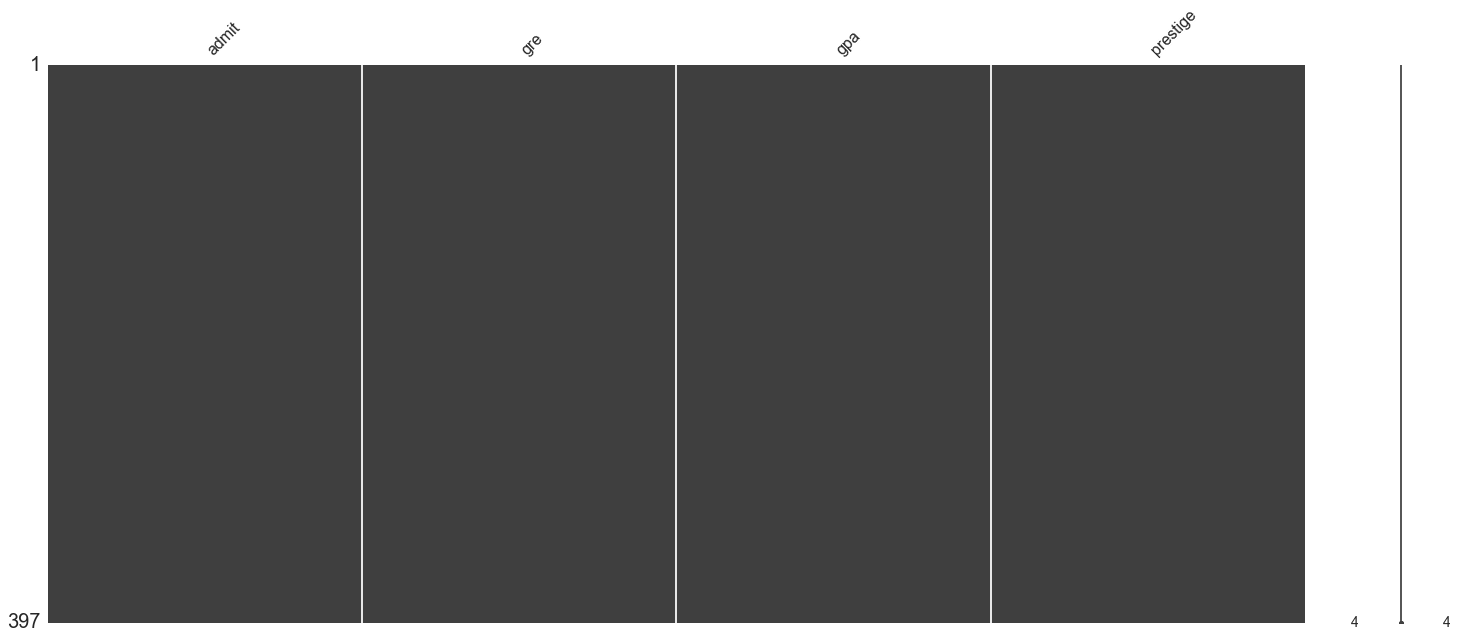

In [411]:
# We now have a complete data set to analyze.
msno.matrix(data_no_null)

## Research Design ##

We want to know what effect, if any, our predictor variables have on our outcome variable. Specifically, is GRE score, GPA, or prestige of a college correlated with whether a student is admitted? If so, to what degree does each variable predict the outcome?

Also, can we predict the outcome of an admissions decision based on new inputs for `gre`, `gpa`, and `prestige`?

## Analysis ##

First, let's look at the correlation coefficients by pair of variables. We're especially interested in the first row (or first column) of the output table, but we'll want to look at the other values as well to be on the lookout for any collinearity. 

In [412]:
# Generate correlation matrix.
data_no_null.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


None of the values indicate extremely high correlation, but this may be due to the fact that our data set is small. `gre` and `gpa` show the strongest (positive) correlation to one another, which might indicate some level of collinearity. `prestige` shows the strongest (negative) correlation to `admit`, which indicates that this might be a particularly useful feature in predicting the admissions decision.

Let's look at a visual representation of the information above using a scatter plot matrix.

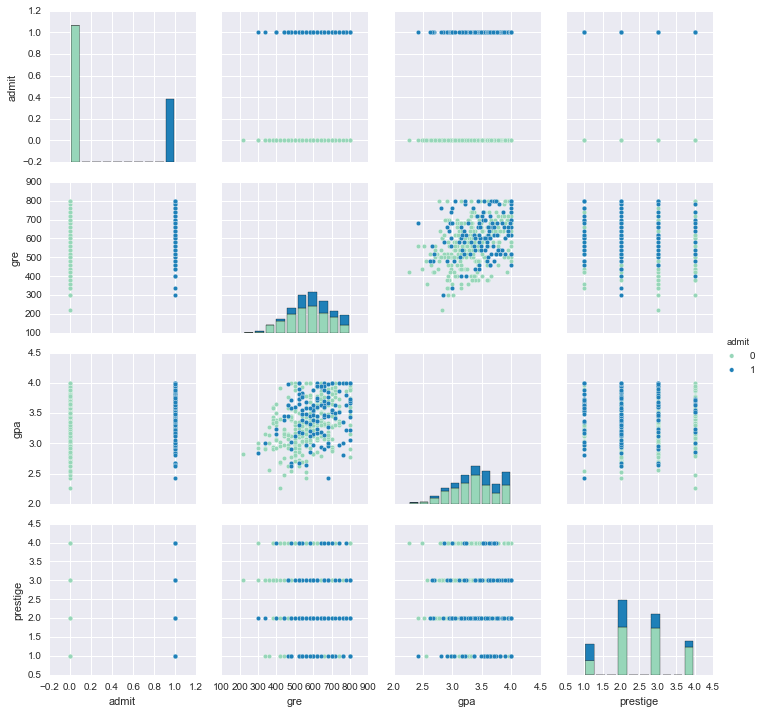

In [413]:
# Examine scatter matrix.
sns.pairplot(data_no_null, palette='YlGnBu', hue='admit')

This visualization shows us a little bit about how the admits versus the non-admits are split up over the various features, but it doesn't appear to be incredibly useful in understanding the role of each feature, especially given the binary nature of the outcome variable.

Since our initial correlation analysis indicated that `prestige` might be a useful predictor of the admissions decision, let's examine this variable in more detail. We'll create a new dataframe with the same data, but we'll add a `count` column, which will help us measure the number of admits by prestige ranking.

In [414]:
# Create a new dataframe with added count column. 
data_nn_counts = data_no_null.copy()
data_nn_counts['count'] = 1
data_nn_counts.head()

,admit,gre,gpa,prestige,count
0,0,380.0,3.61,3.0,1
1,1,660.0,3.67,3.0,1
2,1,800.0,4.00,1.0,1
3,1,640.0,3.19,4.0,1
4,0,520.0,2.93,4.0,1


In [415]:
# Create pivot table to examine number of admits by prestige.
admit_prestige_pivot = pd.pivot_table(data_nn_counts, values='count', index='prestige', columns='admit', aggfunc=np.sum)
admit_prestige_pivot

admit,0,1
prestige,,
1.0,28,33
2.0,95,53
3.0,93,28
4.0,55,12


We can use the information in this pivot table to create a new dataframe that shows us the admit rate by prestige ranking.

In [416]:
# Create new dataframe with admit rate.
admit_prestige = pd.DataFrame()
admit_prestige['prestige'] = admit_prestige_pivot.index
admit_prestige['admit rate'] = pd.Series([
    admit_prestige_pivot.values[0][1]/(admit_prestige_pivot.values[0][0] + admit_prestige_pivot.values[0][1]),
    admit_prestige_pivot.values[1][1]/(admit_prestige_pivot.values[1][0] + admit_prestige_pivot.values[1][1]),
    admit_prestige_pivot.values[2][1]/(admit_prestige_pivot.values[2][0] + admit_prestige_pivot.values[2][1]),
    admit_prestige_pivot.values[3][1]/(admit_prestige_pivot.values[3][0] + admit_prestige_pivot.values[3][1])
    ])
admit_prestige

,prestige,admit rate
0,1.0,0.540984
1,2.0,0.358108
2,3.0,0.231405
3,4.0,0.179104


Next, let's visualize the results from the tables we just created.

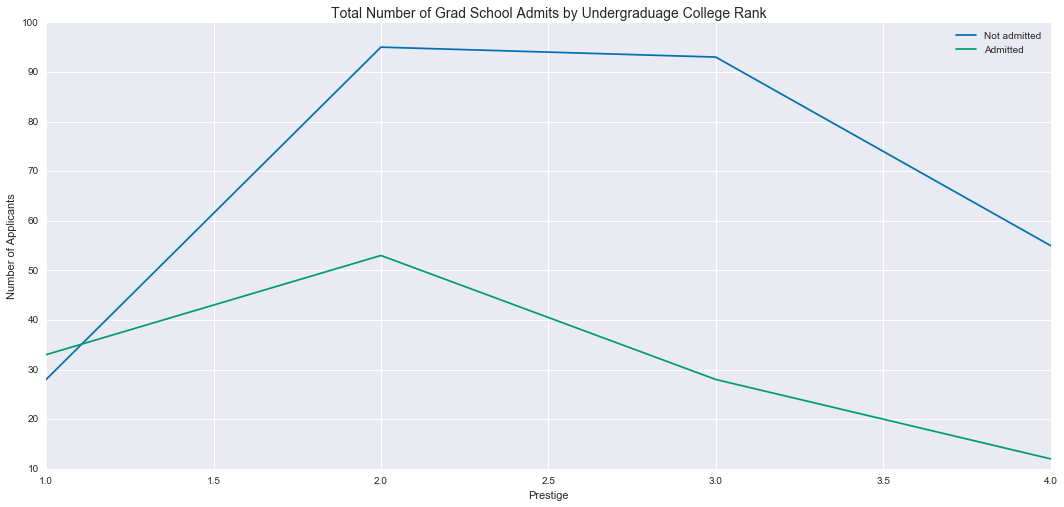

In [417]:
# Plot line chart of number of acceptances by prestige.
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(111)
ax.plot(admit_prestige_pivot.index, admit_prestige_pivot.values)
ax.legend(['Not admitted', 'Admitted'])
ax.set_xlabel('Prestige')
ax.set_ylabel('Number of Applicants')
plt.title('Total Number of Grad School Admits by Undergraduage College Rank', size=14)
sns.set_palette('colorblind')
plt.show()

This line chart indicates that, in general, the higher the undergraduate college ranking, the larger the share of grad school applicants who are admitted. We can use a bar chart to see the exact admit rate for each prestige ranking.

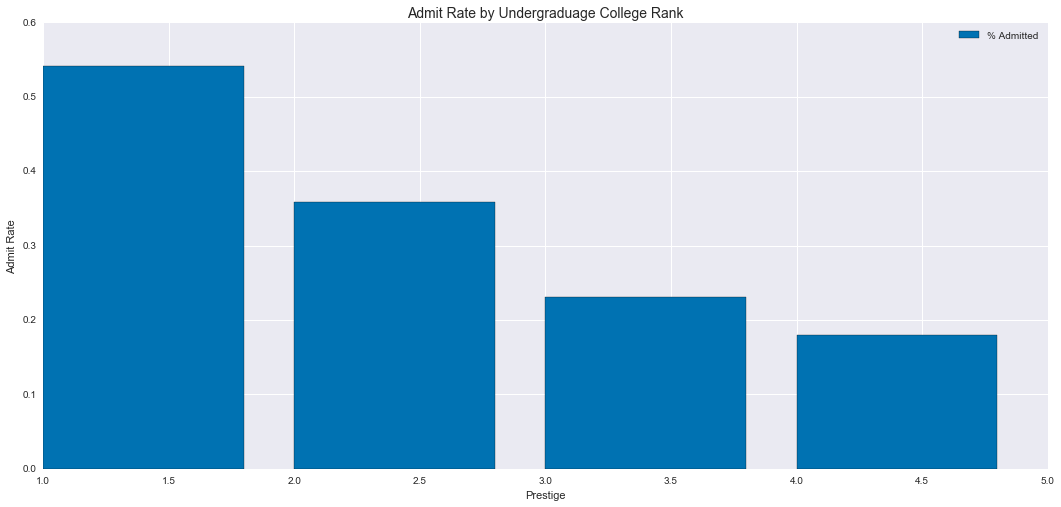

In [418]:
# Plot bar chart of admit rate by prestige.
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(111)
ax.bar(admit_prestige['prestige'], admit_prestige['admit rate'])
ax.legend(['% Admitted'])
ax.set_xlabel('Prestige')
ax.set_ylabel('Admit Rate')
plt.title('Admit Rate by Undergraduage College Rank', size=14)
sns.set_palette('colorblind')
plt.show()

This confirms our initial understanding that a higher undergraduate prestige ranking is strongly correlated with a higher rate of grad school acceptance.

Let's also take a closer look at the relationship between `gre` and `gpa`. We want to determine how strongly correlated these two variables are, as this will help indicate their effectiveness as predictors.

In [419]:
# Create separate dataframes for admitted students and non-admitted students.
admits = data_no_null[data_no_null['admit'] == 1]
non_admits = data_no_null[data_no_null['admit'] == 0]

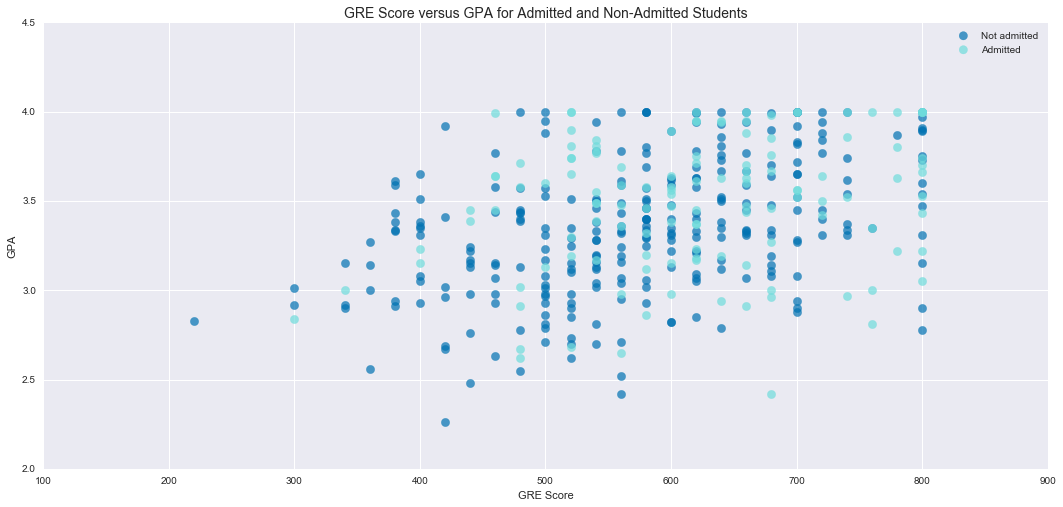

In [420]:
# Plot scatter plot of gre versus gpa for admitted and non-admitted students.
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(111)
ax.scatter(non_admits['gre'], non_admits['gpa'], color='#0072B2', s=70, alpha=0.7)
ax.scatter(admits['gre'], admits['gpa'], color='#6fdcdc', s=70, alpha=0.7)
ax.legend(['Not admitted', 'Admitted'])
ax.set_xlabel('GRE Score')
ax.set_ylabel('GPA')
plt.title('GRE Score versus GPA for Admitted and Non-Admitted Students', size=14)
sns.set_palette('colorblind')
plt.show()

There does appear to be some positive correlation between `gre` and `gpa`, so we might try building our prediction model both with and without both of these features present, to see which performs better.

In order to be able to predict the admissions decision given new inputs for our predictor variables, we'll build a regression model using the data in our data set. We'll use an Ordinary Least Squares (OLS) regression as described in [this tutorial](http://connor-johnson.com/2014/02/18/linear-regression-with-python/) by Connor Johnson.

In [421]:
from sklearn import linear_model
import statsmodels.formula.api as sm

In [422]:
# Create linear regression model.
mlregression = sklearn.linear_model.LinearRegression()

In [423]:
# Run the regression on our data.
data_for_regr = pd.DataFrame(data_no_null)
data_for_regr['ones'] = np.ones(( len(data_for_regr), ))
y = data_for_regr['admit']
X = data_for_regr[['gre','gpa', 'prestige', 'ones']]
result = sm.OLS( y, X ).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  admit   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     13.69
Date:                Tue, 28 Jun 2016   Prob (F-statistic):           1.65e-08
Time:                        16:19:07   Log-Likelihood:                -239.99
No. Observations:                 397   AIC:                             488.0
Df Residuals:                     393   BIC:                             503.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gre            0.0004      0.000      2.063      0.0

The regression output table warns us that there might be some collinearity in our model. Let's see what happens when we remove either `gre` or `gpa`.

In [424]:
# Run the regression without gpa.
data_for_regr = pd.DataFrame(data_no_null)
data_for_regr['ones'] = np.ones(( len(data_for_regr), ))
y = data_for_regr['admit']
X = data_for_regr[['gre', 'prestige', 'ones']]
result = sm.OLS( y, X ).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  admit   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     17.70
Date:                Tue, 28 Jun 2016   Prob (F-statistic):           4.35e-08
Time:                        16:19:07   Log-Likelihood:                -242.64
No. Observations:                 397   AIC:                             491.3
Df Residuals:                     394   BIC:                             503.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gre            0.0006      0.000      3.151      0.0

The Adjusted R-squared statistic has decreased, indicating that our model has lost some of its predictive power. We also still get the collinearity warning, which perhaps points to some correlation between `gre` and `prestige`. What happens when we remove gre instead?

In [425]:
# Run the regression without gre.
data_for_regr = pd.DataFrame(data_no_null)
data_for_regr['ones'] = np.ones(( len(data_for_regr), ))
y = data_for_regr['admit']
X = data_for_regr[['gpa', 'prestige', 'ones']]
result = sm.OLS( y, X ).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  admit   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     18.25
Date:                Tue, 28 Jun 2016   Prob (F-statistic):           2.63e-08
Time:                        16:19:07   Log-Likelihood:                -242.13
No. Observations:                 397   AIC:                             490.3
Df Residuals:                     394   BIC:                             502.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gpa            0.1959      0.059      3.311      0.0

Adjusted R-squared is back up slightly and the collinearity warning is no longer present, but we still had better predictive power overall in our initial model.

So, for our purposes in this analysis, we would want to look at GRE Score, GPA, *and* the undergraduate college rank in order to make the best prediction about a student's chances of being accepted into grad school.